In [16]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_excel('./data/SWaT_dataset_Jul 19 v2.xlsx')

In [2]:
df.head(3)

,GMT +0,FIT 101,LIT 101,MV 101,P1_STATE,P101 Status,P102 Status,AIT 201,AIT 202,AIT 203,...,LSH 601,LSH 602,LSH 603,LSL 601,LSL 602,LSL 603,P6 STATE,P601 Status,P602 Status,P603 Status
0,2019-07-20T08:39:59.004013Z,4.323736,492.896881,2,2,2,1,131.408615,9.313829,257.933868,...,Active,Active,Inactive,Inactive,Inactive,Active,2,1,1,1
1,2019-07-20T08:39:58.0050048Z,4.323736,492.465100,2,2,2,1,131.408615,9.316713,257.703156,...,Active,Active,Inactive,Inactive,Inactive,Active,2,1,1,1
2,2019-07-20T08:39:57.0050048Z,4.303558,492.308100,2,2,2,1,131.408615,9.317354,257.703156,...,Active,Active,Inactive,Inactive,Inactive,Active,2,1,1,1


In [3]:
print(set([df[col].dtype for col in df.columns]))

{dtype('O'), dtype('int64'), dtype('float64')}


### Some info about the features

In [4]:
real_cnt,int_cnt, cat_cnt = 0, 0, 0
for col in df.columns:
    if col == "GMT +0":
        continue # we don't want to count the timestamp
    if df[col].dtype == "object":
        cat_cnt += 1
        print(f"(Type:{df[col].dtype}, values: {df[col].unique()})")

(Type:object, values: ['Inactive'])
(Type:object, values: ['Inactive'])
(Type:object, values: ['Inactive'])
(Type:object, values: ['Inactive'])
(Type:object, values: ['Inactive'])
(Type:object, values: ['Active' 'Inactive'])
(Type:object, values: ['Active'])
(Type:object, values: ['Inactive'])
(Type:object, values: ['Inactive'])
(Type:object, values: ['Inactive'])
(Type:object, values: ['Active'])


In [5]:
for col in df.columns:
    if col == "GMT +0":
        continue # we don't want to count the timestamp
    if df[col].dtype == "int64":
        int_cnt+=1
        print(f"({col},Type:{df[col].dtype}, values: {df[col].unique()})")
    else:
        real_cnt += 1

(MV 101,Type:int64, values: [2 0 1])
(P1_STATE,Type:int64, values: [2 3])
(P101 Status,Type:int64, values: [2 1])
(P102 Status,Type:int64, values: [1])
(MV201,Type:int64, values: [2 0 1])
(P2_STATE,Type:int64, values: [2])
(P201 Status,Type:int64, values: [1])
(P202 Status,Type:int64, values: [1])
(P203 Status,Type:int64, values: [2 1])
(P204 Status,Type:int64, values: [1])
(P205 Status,Type:int64, values: [2 1])
(P206 Status,Type:int64, values: [1])
(P207 Status,Type:int64, values: [1])
(P208 Status,Type:int64, values: [1])
(MV 301,Type:int64, values: [1 0 2])
(MV 302,Type:int64, values: [2 0 1])
(MV 303,Type:int64, values: [1 0 2])
(MV 304,Type:int64, values: [1 0 2])
(P3_STATE,Type:int64, values: [ 7  6  5  4 16 15 14 10  9  2 99])
(P301 Status,Type:int64, values: [2 1])
(P302 Status,Type:int64, values: [1])
(AIT 401,Type:int64, values: [0])
(P4_STATE,Type:int64, values: [4])
(P401 Status,Type:int64, values: [2 1])
(P402 Status,Type:int64, values: [1])
(P403 Status,Type:int64, value

In [6]:
print(f"Num of cols: {len(list(df.columns))}")
print(f"Num of categorical feature {cat_cnt}")
print(f"Num of int feature {int_cnt}")
print(f"Num of float feature {real_cnt}")

Num of cols: 78
Num of categorical feature 11
Num of int feature 39
Num of float feature 38


In [7]:
df[[col for col in df.columns if df[col].dtype == 'float64']].describe()

,FIT 101,LIT 101,AIT 201,AIT 202,AIT 203,FIT 201,AIT 301,AIT 302,AIT 303,DPIT 301,...,AIT 503,AIT 504,FIT 501,FIT 502,FIT 503,FIT 504,PIT 501,PIT 502,PIT 503,FIT 601
count,14996.000000,14996.000000,14996.000000,14996.000000,14996.000000,14996.000000,14996.000000,14996.000000,14996.000000,14996.000000,...,14996.000000,14996.000000,14996.000000,14996.000000,14996.000000,14996.000000,14996.000000,14996.000000,14996.000000,14996.000000
mean,0.740876,733.960251,138.766501,9.210022,247.985162,0.869760,8.718149,283.695239,142.095907,6.510505,...,1016.263990,25.231166,0.798153,0.340819,0.611743,0.211526,160.706744,4.673115,115.157048,0.000402
std,1.634632,110.960185,8.265845,0.175812,11.806186,1.121283,0.102093,8.547831,3.166724,5.556797,...,0.028943,1.862370,0.033274,0.041552,0.015349,0.006174,5.707502,18.183883,5.324942,0.003317
min,0.000000,491.169769,113.849014,8.768457,198.077423,0.000000,8.339394,256.431274,134.131500,0.918753,...,1016.053590,23.647783,0.457703,0.001793,0.583043,0.198059,158.132523,2.450902,111.654060,0.000000
25%,0.000000,640.595184,131.536789,9.090170,239.887200,0.000384,8.665143,277.303284,142.710800,1.206863,...,1016.277890,24.609074,0.799539,0.327270,0.608264,0.209909,159.526400,2.851376,114.233528,0.000256
50%,0.000000,819.636841,143.713150,9.233082,246.218918,0.000513,8.745566,281.656952,143.383057,1.498175,...,1016.277890,24.839785,0.801589,0.346868,0.610441,0.211126,160.231354,2.883414,114.714172,0.000320
75%,0.000000,820.971436,144.033585,9.345873,257.190460,2.320187,8.790512,292.285034,143.863235,12.520008,...,1016.277890,25.032044,0.802871,0.365441,0.611465,0.211895,160.695969,2.963509,115.002563,0.000320
max,4.403484,825.092957,146.821335,9.490067,272.289154,2.342357,8.895800,299.020416,153.787048,12.913759,...,1016.438110,47.103306,0.827736,0.515307,0.769324,0.275694,219.014359,192.371765,170.565247,0.137315


In [8]:
ts_with_attackes = ["FIT 401", "LIT 301", "P601 Status","MV201", "P101 Status", "MV 501", "P301 Status"]

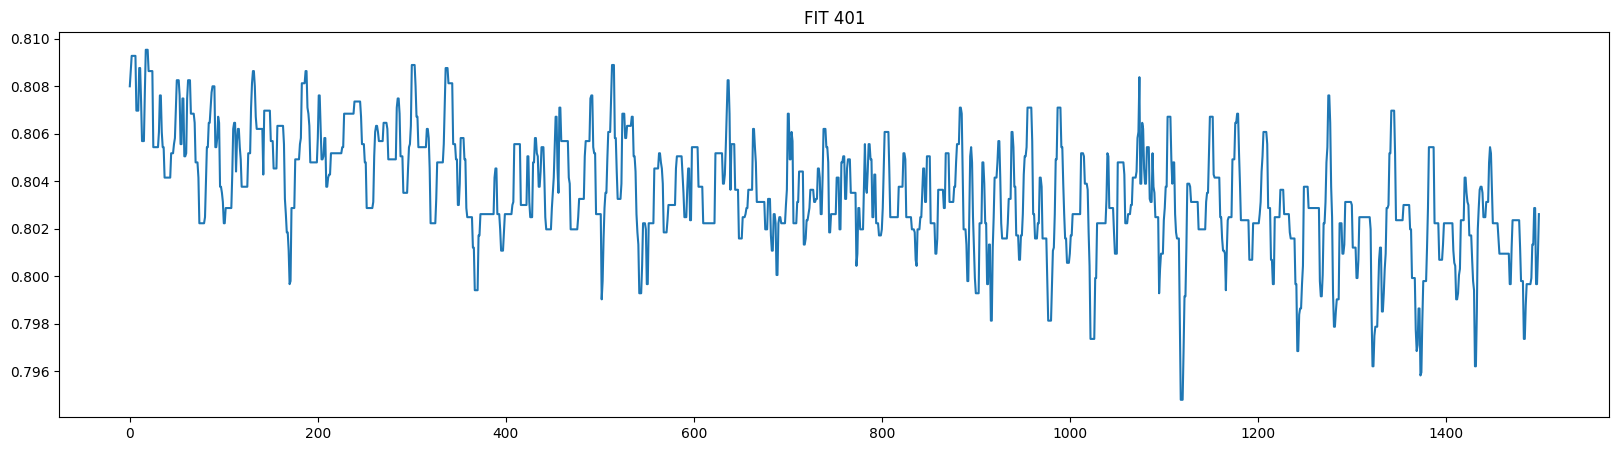

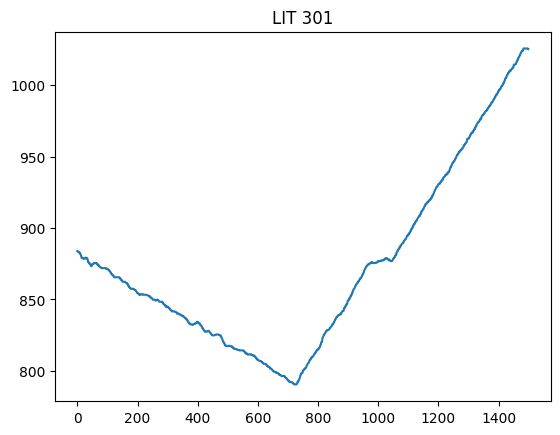

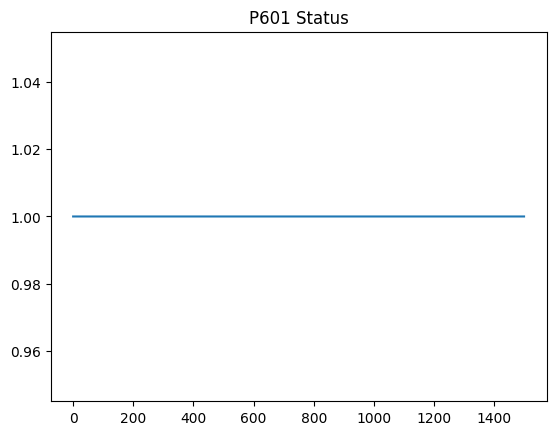

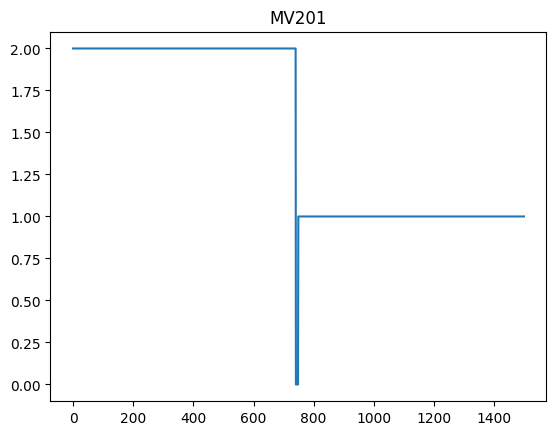

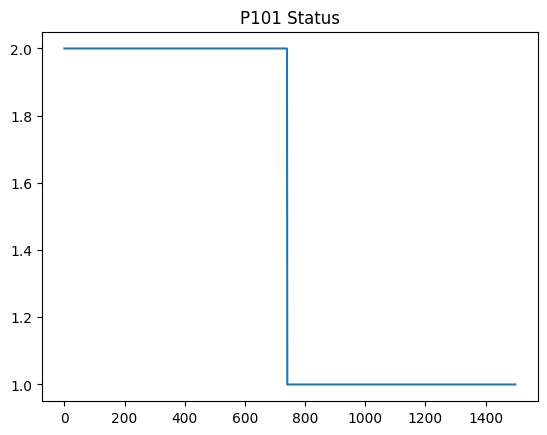

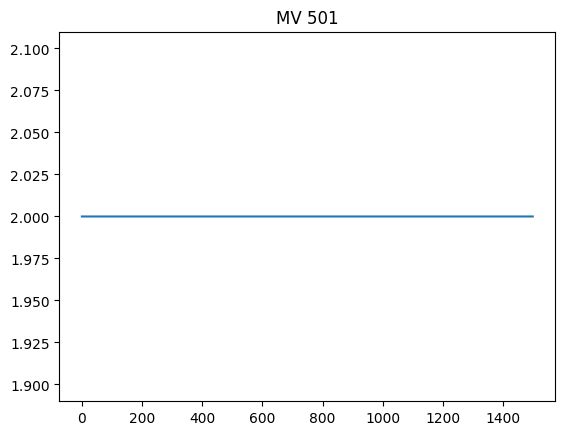

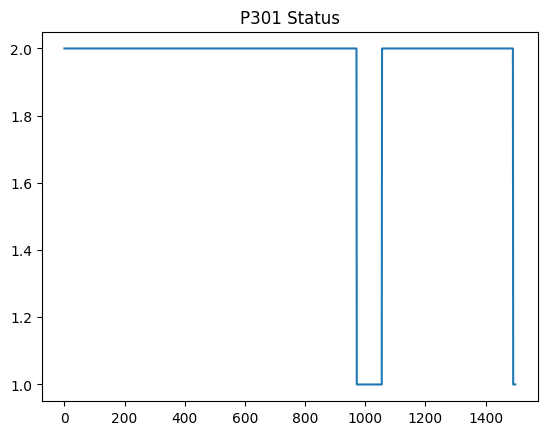

In [45]:
plt.figure(figsize=(20, 5))
for col in ts_with_attackes:
    plt.plot(df[col][:1500])
    plt.title(col)
    plt.show()